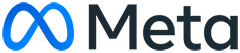

# **Getting to know Llama 2: Everything you need to start building**
Our goal in this session is to provide a guided tour of Llama 2, including understanding different Llama 2 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 2 projects.

##**0 - Prerequisites**
* Basic understanding of Large Language Models

* Basic understanding of Python

In [2]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain)
    C-->|User Input|D[Llama 2]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 2]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def apps_and_llms():
  mm("""
  graph LR;
    users --> apps
    apps --> frameworks
    frameworks --> platforms
    platforms --> Llama 2
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_2
  Llama_2 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


##**1 - Understanding Llama 2**

### **1.1 - What is Llama 2?**

* State of the art (SOTA), Open Source LLM
* 7B, 13B, 70B
* Pretrained + Chat
* Choosing model: Size, Quality, Cost, Speed
* [Research paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)

* [Responsible use guide](https://ai.meta.com/llama/responsible-use-guide/)

In [3]:
llama2_family()

###**1.2 - Accessing Llama 2**
* Download + Self Host (on-premise)
* Hosted API Platform (e.g. [Replicate](https://replicate.com/meta))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 2**
* Content Generation
* Chatbots
* Summarization
* Programming (e.g. Code Llama)

* and many more...

##**2 - Using Llama 2**

In this notebook, we are going to access [Llama 13b chat model](https://replicate.com/meta/llama-2-13b-chat) using hosted API from Replicate.

### **2.1 - Install dependencies**

In [1]:
# Install dependencies and initialize
%pip install -qU \
    replicate \
    langchain \
    sentence_transformers \
    pdf2image \
    pdfminer \
    pdfminer.six \
    unstructured \
    faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.8/811.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 31.5 MB/s eta 

In [4]:
# model url on Replicate platform that we will use for inferencing
# We will use llama 23b chat model hosted on replicate server ()

llama2_13b = "meta/llama-2-13b-chat:f4e2de70d66816a838a89eeeb621910adffb0dd0baba3976c96980970978018d"

In [5]:
# We will use Replicate hosted cloud environment
# Obtain Replicate API key → https://replicate.com/account/api-tokens)

# enter your replicate api token
from getpass import getpass
import os

REPLICATE_API_TOKEN = getpass()
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

# alternatively, you can also store the tokens in environment variables and load it here
#r8_bfP2CsHwifqYTblFUCijzKlnkEA6Hmx15QmLK

··········


In [6]:
# we will use replicate's hosted api
import replicate

# text completion with input prompt
def Completion(prompt):
  output = replicate.run(
      llama2_13b,
      input={"prompt": prompt, "max_new_tokens":1000}
  )
  return "".join(output)

# chat completion with input prompt and system prompt
def ChatCompletion(prompt, system_prompt=None):
  output = replicate.run(
    llama2_13b,
    input={"system_prompt": system_prompt,
            "prompt": prompt,
            "max_new_tokens":1000}
  )
  return "".join(output)

### **2.2 - Basic completion**

In [10]:
output = Completion(prompt="Which country is the last winner of the futbol world cup")
md(output)

 Hello! As a helpful assistant, I'd be happy to help you with your question. The last winner of the FIFA World Cup was France, who won the tournament in 2018 by defeating Croatia 4-2 in the final match. This victory marked France's second World Cup title, following their previous win in 1998.

### **2.3 - System prompts**


In [15]:
output = ChatCompletion(
    prompt="The typical color of a llama is: ",
    system_prompt="respond with only one word"
  )
md(output)

 Gray.

### **2.4 - Response formats**
* Can support different formatted outputs e.g. text, JSON, etc.

In [18]:
output = ChatCompletion(
    prompt="The typical color of a llama is: ",
    system_prompt="response in json format"
  )
md(output)

 {
"answer": "The typical color of a llama is brown."
}

## **3 - Gen AI Application Architecture**

Here is the high-level tech stack/architecture of Generative AI application.

In [ ]:
genai_app_arch()

##4 - **Chatbot Architecture**

Here are the key components and the information flow in a chatbot.

* User Prompts
* Input Safety
* Llama 2
* Output Safety

* Memory & Context

In [ ]:
bot_arch()

### **4.1 - Chat conversation**
* LLMs are stateless
* Single Turn

* Multi Turn (Memory)



In [23]:
# example of single turn chat
prompt_chat = "What is the average lifespan of a Llama?"
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the last question in few words")
md(output)

 Sure! The average lifespan of a llama is around 20-30 years.

In [27]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they?"
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the last question in few words")
md(output)


 Sure! Here's my answer in a few words:

Kangaroos.

Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [28]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?
"""
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the last question")
md(output)

 Sure, I'd be happy to help! Llamas are members of the camelid family, which includes other animals like camels and alpacas.

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [33]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?
'''
output = ChatCompletion(prompt, system_prompt="One words response")
md(output)

 Cute

In [34]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:'''

output = ChatCompletion(prompt, system_prompt="One word response")
md(output)

 Neutral

In [35]:
# another zero-shot learning
prompt = '''
QUESTION: Vicuna?
ANSWER:'''

output = ChatCompletion(prompt, system_prompt="one word response")
md(output)

 Luxurious.

In [36]:
# Another few-shot learning example with formatted prompt.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:'''

output = ChatCompletion(prompt, system_prompt="one word response")
md(output)

 Yes

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [39]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
'''

output = ChatCompletion(prompt, system_prompt="provide short answer")
md(output)

 Sure! Here's the answer:

Llama has 8 tennis balls now.

In [40]:
# Chain-Of-Thought prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
Let's think step by step.
'''

output = ChatCompletion(prompt, system_prompt="provide short answer")
md(output)

 Sure! Here's the solution step by step:

1. Llama starts with 5 tennis balls.
2. Llama buys 2 more cans of tennis balls, and each can contains 3 tennis balls.
3. So, Llama now has 5 + 2 x 3 = 5 + 6 = 11 tennis balls.

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





In [ ]:
rag_arch()

#### **4.3.1 - LangChain**
LangChain is a framework that helps make it easier to implement RAG.

In [42]:
# langchain setup
from langchain.llms import Replicate
# Use the Llama 2 model hosted on Replicate
# Temperature: Adjusts randomness of outputs, greater than 1 is random and 0 is deterministic, 0.75 is a good starting value
# top_p: When decoding text, samples from the top p percentage of most likely tokens; lower to ignore less likely tokens
# max_new_tokens: Maximum number of tokens to generate. A word is generally 2-3 tokens
llama_model = Replicate(
    model=llama2_13b,
    model_kwargs={"temperature": 0.75,"top_p": 1, "max_new_tokens":1000}
)

In [45]:
pip install pillow-heif

In [50]:
pip install unstructured-inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.8 MB/s eta 0:0

In [52]:
pip install pikepdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [54]:
pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 5.0 MB/s eta 0:00:00


In [55]:
# Step 1: load the external data source. In our case, we will load Meta’s “Responsible Use Guide” pdf document.
from langchain.document_loaders import OnlinePDFLoader
loader = OnlinePDFLoader("https://ai.meta.com/static-resource/responsible-use-guide/")
documents = loader.load()

# Step 2: Get text splits from document
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

# Step 3: Use the embedding model
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-mpnet-base-v2" # embedding model
model_kwargs = {"device": "cpu"}
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

# Step 4: Use vector store to store embeddings
vectorstore = FAISS.from_documents(all_splits, embeddings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### **4.3.2 - LangChain Q&A Retriever**
* ConversationalRetrievalChain

* Query the Source documents


In [56]:
# Query against your own data
from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llama_model, vectorstore.as_retriever(), return_source_documents=True)

chat_history = []
query = "How is Meta approaching open science in two short sentences?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 Sure! Here's my helpful answer based on the provided context:

Meta is committed to open science by open sourcing its code and datasets for machine translation, computer vision, and fairness evaluation, while implementing safety measures to address context-specific risks. This approach aims to democratize access to advanced AI technologies, foster collaboration across the AI community, and ensure responsible deployment for global challenges.

In [57]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "How is it benefiting the world?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

 Based on the provided context, here is my answer to the question:

Meta's commitment to open science by making its cutting-edge large language models (LLMs) available to the scientific community through research releases has enabled collaboration and exploratory research, leading to better and safer models. This democratization of access has unlocked the benefits of this technology, allowing developers in every industry on a global scale to drive breakthroughs and benefit from accelerations in technological advancement and economic growth. Additionally, Meta's open releases have spurred research in model efficiency, medicine, and conversational safety studies, contributing to the infrastructure of the AI-developer community with tools like PyTorch, ONNX, Glow, and Detectron. By empowering developers and putting these models in more people's hands, Meta's approach aligns with its mission to advance the state of the art of all sizes across the globe for the benefit of all, ensuring responsible deployment of AI and mitigating risks through fairness and inclusion, robustness and safety, privacy and security, and transparency and control.

In [66]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "Which is the best football team in argentina?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

 I don't know the answer to that question. I'm just an AI, I don't have access to real-time information or specific knowledge about sports teams or their performance. However, I can suggest some possible sources of information that might be helpful in answering this question, such as online sports news websites, social media, or official team websites. Additionally, there may be various opinions and rankings available from different sources, so it's important to consider multiple perspectives before coming to a conclusion.

## **5 - Fine-Tuning Models**

* Limitatons of Prompt Eng and RAG
* Fine-Tuning Arch
* Types (PEFT, LoRA, QLoRA)
* Using PyTorch for Pre-Training & Fine-Tuning

* Evals + Quality


In [ ]:
fine_tuned_arch()

## **6 - Responsible AI**

* Power + Responsibility
* Hallucinations
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



##**7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community
* Safety and responsible use is paramount!

* Call-To-Action
  * [Replicate Free Credits](https://replicate.fyi/connect2023) for Connect attendees!
  * This notebook is available through Llama Github recipes
  * Use Llama in your projects and give us feedback


#### **Resources**
- [GitHub - Llama 2](https://github.com/facebookresearch/llama)
- [Github - LLama 2 Recipes](https://github.com/facebookresearch/llama-recipes)
- [Llama 2](https://ai.meta.com/llama/)
- [Research Paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)
- [Model Card](https://github.com/facebookresearch/llama/blob/main/MODEL_CARD.md)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)
- [Replicate](https://replicate.com/meta/)
- [LangChain](https://www.langchain.com/)



#### **Authors & Contact**
  * asangani@meta.com, [Amit Sangani | LinkedIn](https://www.linkedin.com/in/amitsangani/)
  * mohsena@meta.com, [Mohsen Agsen | LinkedIn](https://www.linkedin.com/in/mohsen-agsen-62a9791/)
